In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Name**    - **Customer Satisfaction Prediction**



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Team Member 1** - Jennica B


# **Project Summary -**

This project focuses on analyzing customer support interaction data from ShopZilla, an eCommerce platform, to predict Customer Satisfaction (CSAT) using machine learning and deep learning techniques. It begins with a structured exploratory data analysis (EDA) to identify trends and key factors influencing customer satisfaction, using univariate, bivariate, and multivariate visualizations.

After cleaning and preprocessing the data, various classification models—such as Logistic Regression, Random Forest, XGBoost, and a Deep Neural Network (DNN)—were built and evaluated. Cross-validation and hyperparameter tuning were applied to optimize performance. Metrics like accuracy, precision, recall, and F1-score were used to assess each model.

The final model offers valuable insights for customer support teams to identify dissatisfaction early and enhance service quality. This solution supports data-driven decision-making aimed at improving customer retention and experience.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


With the increasing importance of delivering exceptional customer support experiences in the eCommerce industry, businesses are seeking data-driven methods to assess and improve customer satisfaction. ShopZilla, a global eCommerce platform, has amassed a large volume of customer support interaction data. This project aims to analyze this data to uncover key insights through exploratory data analysis (EDA) and develop a robust machine learning classification model that can predict Customer Satisfaction (CSAT) levels. The objective is to identify factors that significantly impact customer satisfaction, thereby enabling the business to enhance service quality, reduce churn, and increase customer loyalty.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For date/time operations
from datetime import datetime


### Dataset Loading

In [ ]:
file_path = '/content/drive/MyDrive/eCommerce_Customer_support_data.csv'
df = pd.read_csv(file_path)



### Dataset First View

In [ ]:
# Show the first few rows
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
no_rows, no_columns = df.shape
print(f'Number of rows in the dataset: {no_rows}')
print(f'Number of colummns in the dataset: {no_columns}')

Number of rows in the dataset: 85907
Number of colummns in the dataset: 20


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup_count = df.duplicated().sum()
print(f'Number of duplicated rows: {dup_count}')

Number of duplicated rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Mssing Values')
df.isnull().sum()

Mssing Values


,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
# Visualizing the missing values
!pip install missingno

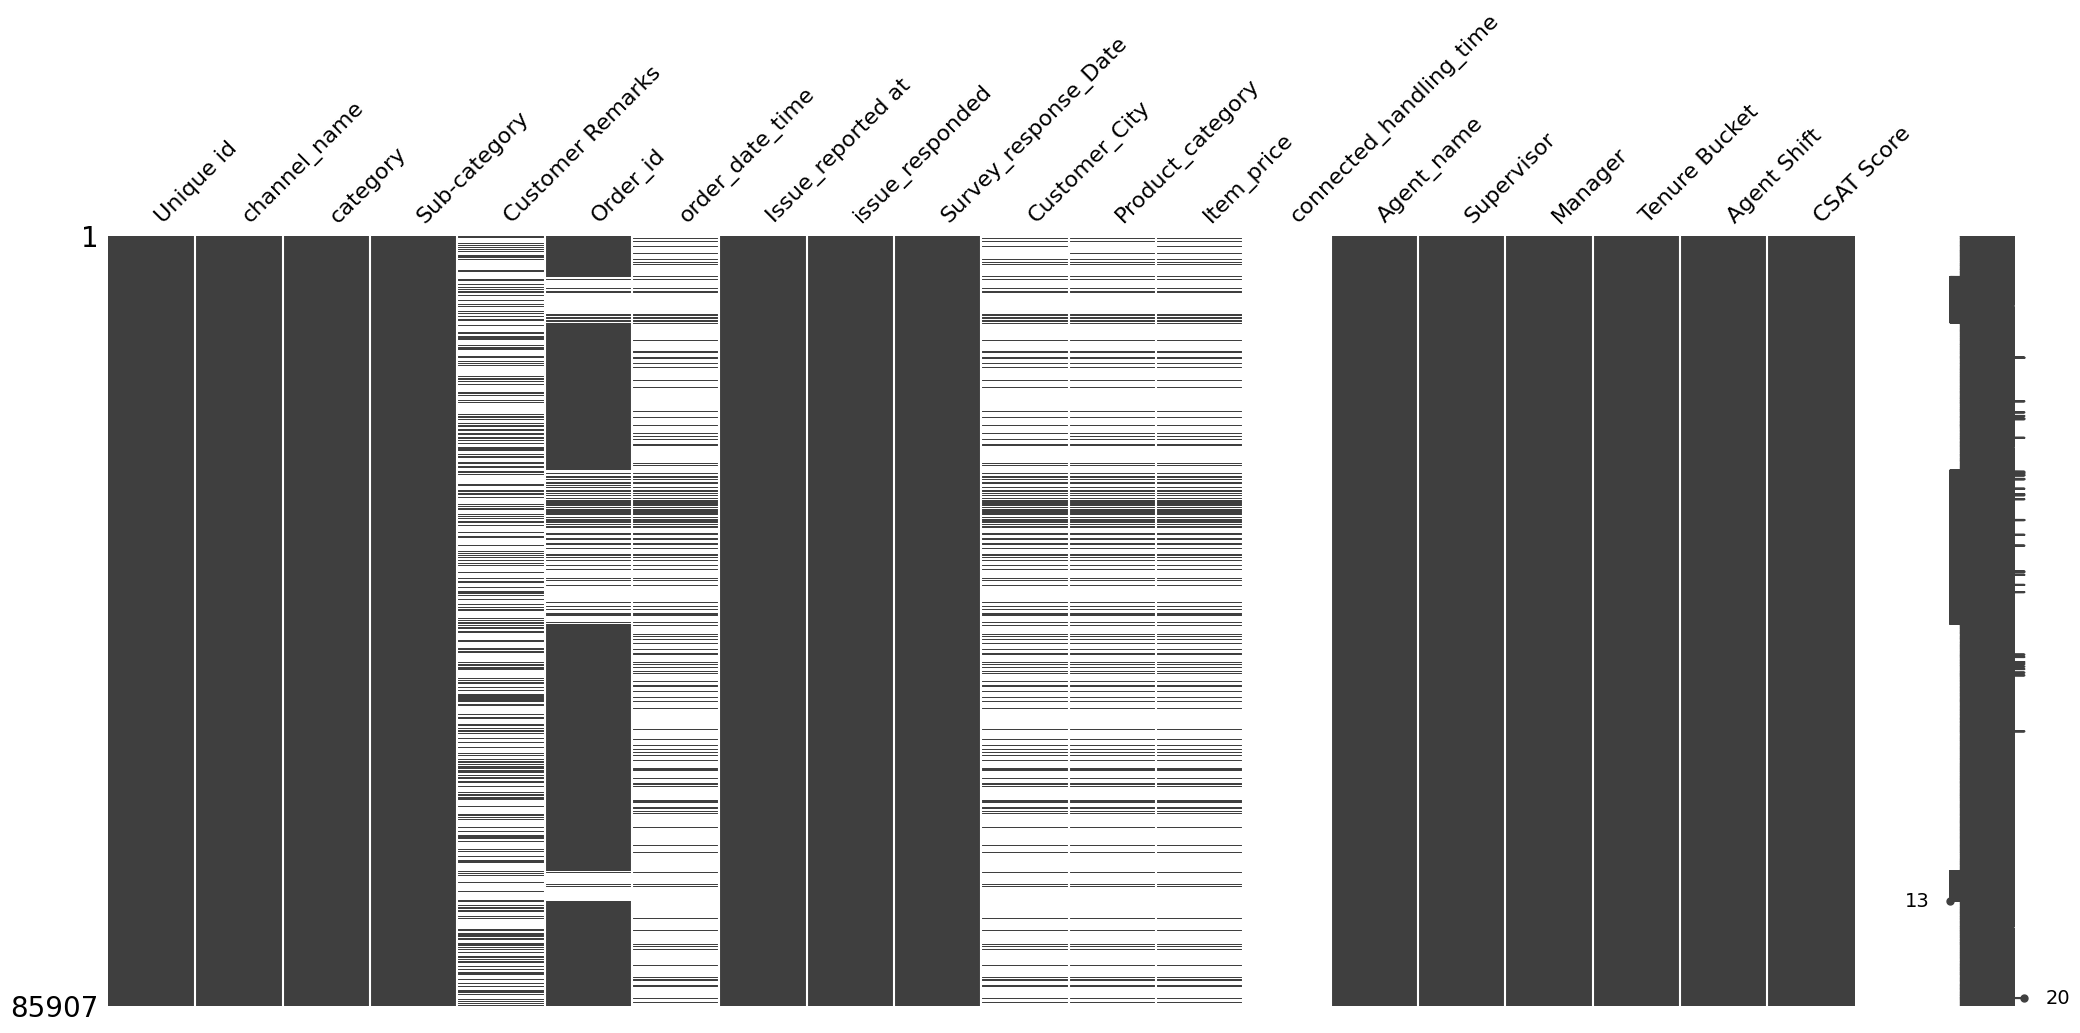

In [ ]:
import missingno as msno

#Visual summary of missing values
msno.matrix(df)
plt.show()

<Axes: >

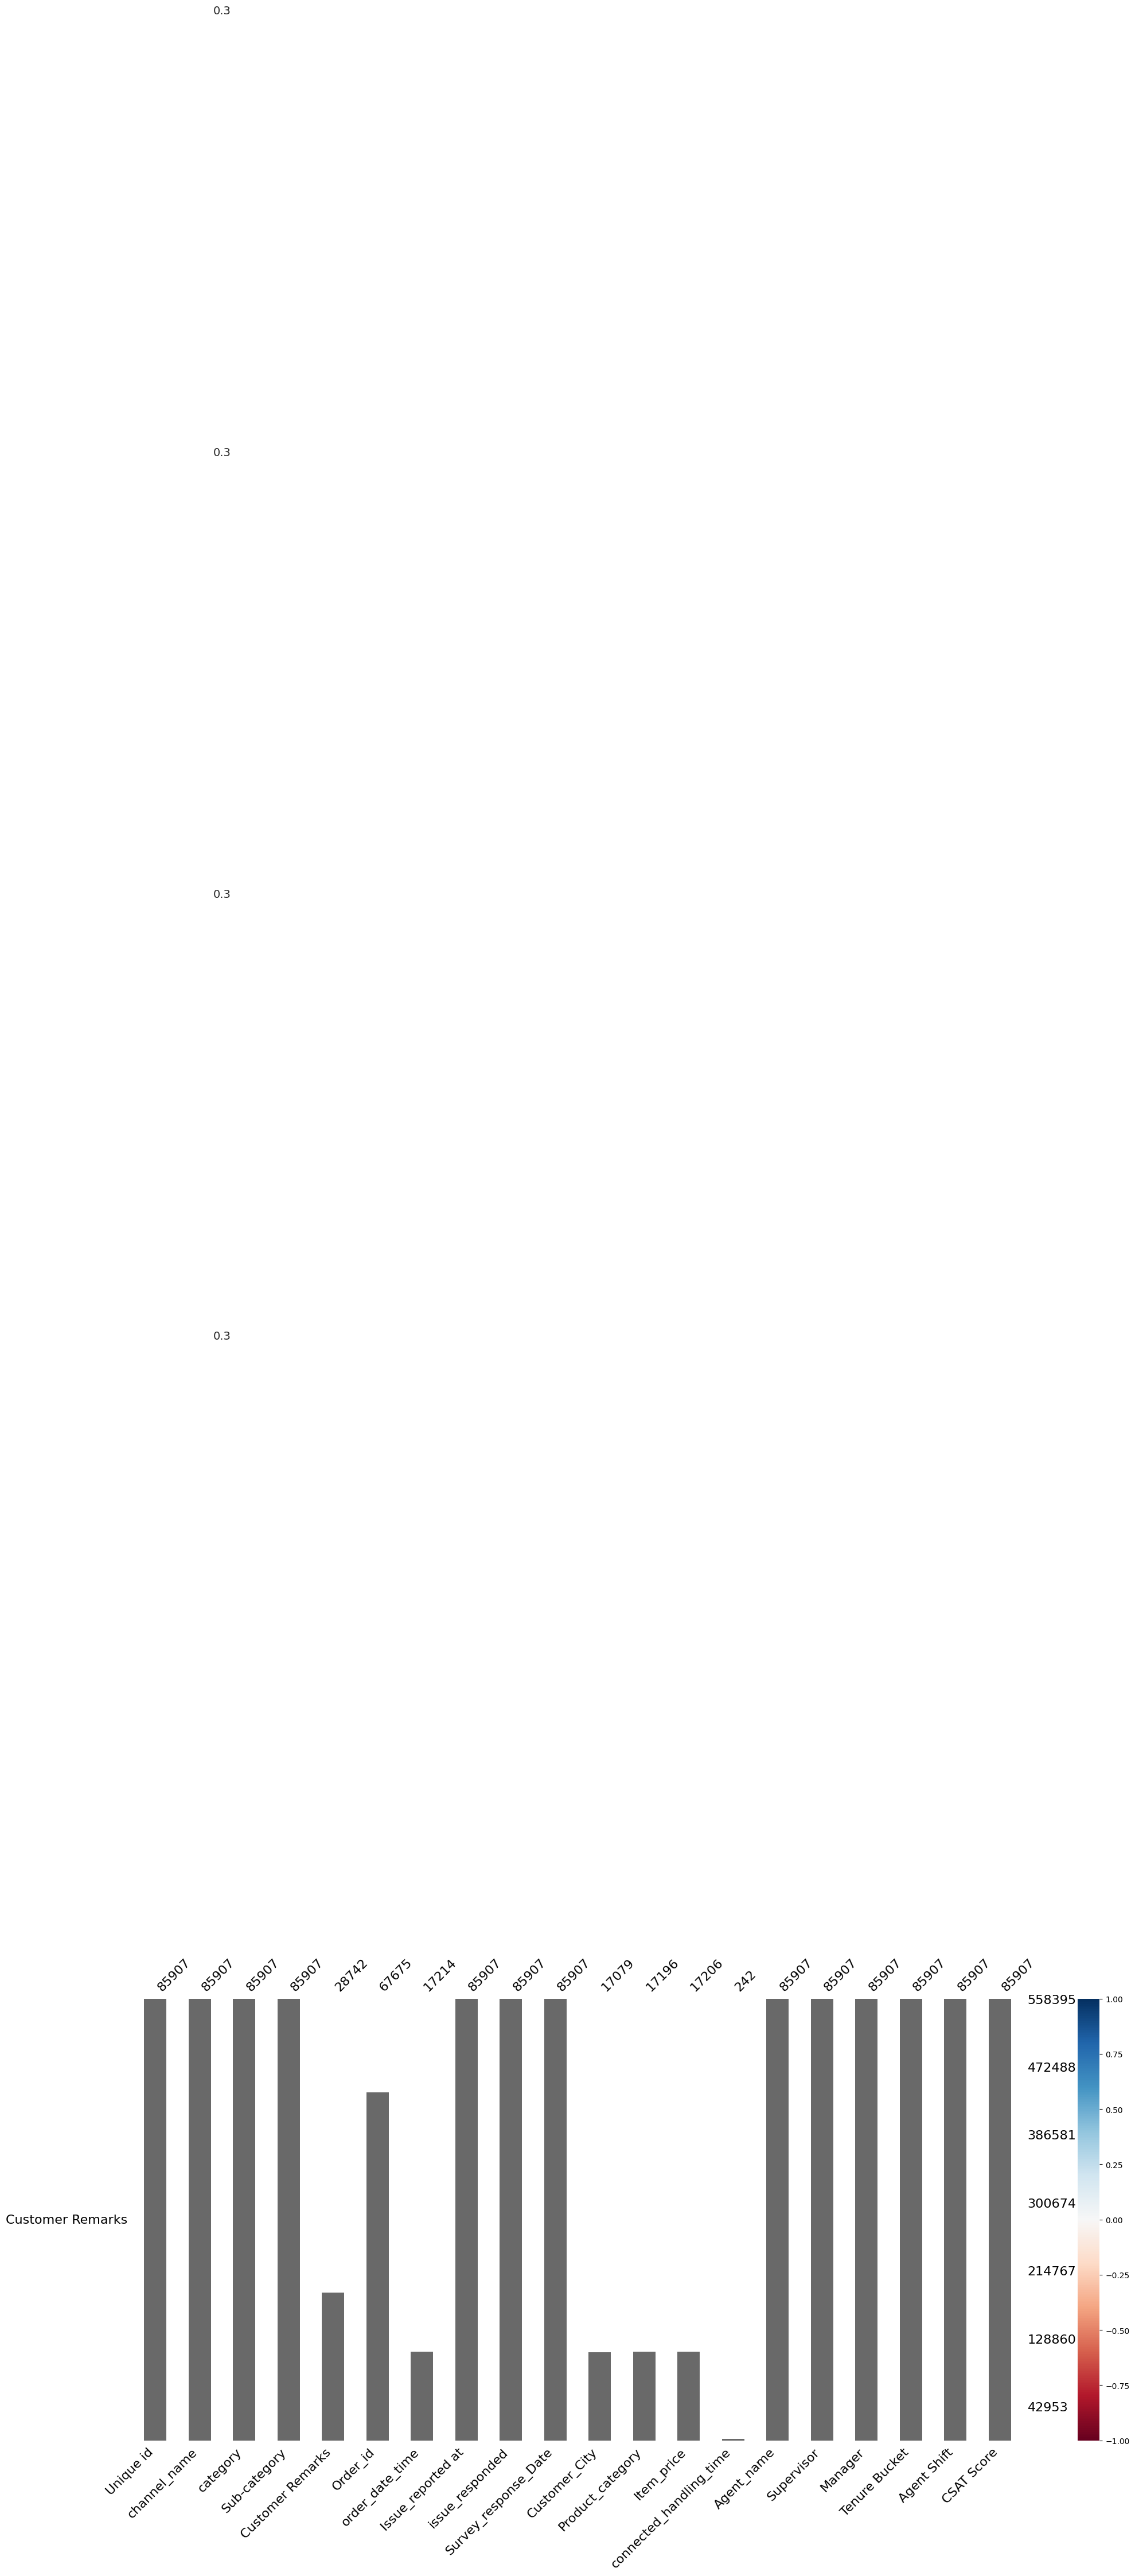

In [ ]:
# Heatmap to show correlations of missingness
msno.heatmap(df)

# Bar chart of missing values per column
msno.bar(df)


### What did you know about your dataset?

####1. Dataset Overview:
   
    Total rows: 85,907

    Total columns: 20

    No duplicate rows.

    The dataset contains customer service interactions including issue details, agent info, response time, and CSAT score.

####2. Missing Values:
   
    There are significant missing values in several columns:
    
     - connected_handling_time: >99% missing (useful only if cleaned or dropped).
     
     - order_date_time: 80% missing.
     
     - Customer Remarks: ~66% missing.
     
     - Item_price, Product_category, Customer_City: all have >68,000 missing.

    👉 Columns like Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift, and CSAT Score have complete data and are reliable for modeling.



#### 3. Data Type Observations:

     Issue_reported at, issue_responded, Survey_response_Date, order_date_time are stored as objects (strings), not datetime.

     These should be converted to datetime to derive features like:

      - Response time

      - Time of day/week

      - SLA breaches

#### 4. CSAT Score Distribution:

     - CSAT Score ranges from 1 to 5.

     - Initial visual suggests most scores are high (4 or 5), with relatively few negative reviews. Likely face class imbalance if framing this as a classification problem.

#### 5. Categorical Columns:

     - Multiple categorical columns (e.g., channel_name, category, Supervisor) can be used for one-hot encoding or embedding-based models.

    - Tenure Bucket and Agent Shift may reveal trends in service quality.

####6. Data Cleaning Needs:

    - should drop or impute missing values in Item_price, Customer_City, Product_category if they’re to be used.

    - should consider removing connected_handling_time due to almost total missingness.

    - should convert datetime columns and create new features like: Response duration = issue_responded - Issue_reported at

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [ ]:
df.dtypes

,0
Unique id,object
channel_name,object
category,object
Sub-category,object
Customer Remarks,object
Order_id,object
order_date_time,object
Issue_reported at,object
issue_responded,object
Survey_response_Date,object


### Variables Description

In [ ]:
import pandas as pd

# Load your dataset first (example)
# df = pd.read_csv('your_file.csv')

# Step 1: Extract column names and types
columns = df.columns.tolist()
dtypes = df.dtypes.astype(str).tolist()

# Step 2: Provide manual descriptions in the same order as df.columns
descriptions = [
    "Unique identifier for each case. Not predictive.",
    "Customer interaction channel (e.g., web, app, phone).",
    "High-level issue category (e.g., delivery, product).",
    "Sub-category of the issue. More specific than 'category'.",
    "Text remarks by customer. Use NLP to extract sentiment.",
    "Transaction/order identifier. Not predictive.",
    "Timestamp of order. Can extract date/time features.",
    "When the issue was reported. Used to compute lag.",
    "When support responded. Helps calculate response time.",
    "Survey submission date. Can help compute resolution duration.",
    "City of customer. Can be encoded or grouped.",
    "Product type involved in the case. Categorical.",
    "Price of item. Continuous feature.",
    "Agent handling time. Continuous feature.",
    "Name of support agent. High cardinality.",
    "Agent's supervisor. Optional for grouping.",
    "Agent's manager. Optional for grouping.",
    "Experience level of agent (e.g., 0-1 yr, 1-3 yrs).",
    "Shift during which agent handled the issue.",
    "Customer Satisfaction Score (target variable)."
]

# Step 3: Combine into a table
df_summary = pd.DataFrame({
    "Column Name": columns,
    "Data Type": dtypes,
    "Description": descriptions
})

# Display the table
df_summary.style.set_properties(**{'text-align': 'left'})


,Column Name,Data Type,Description
0,Unique id,object,Unique identifier for each case. Not predictive.
1,channel_name,object,"Customer interaction channel (e.g., web, app, phone)."
2,category,object,"High-level issue category (e.g., delivery, product)."
3,Sub-category,object,Sub-category of the issue. More specific than 'category'.
4,Customer Remarks,object,Text remarks by customer. Use NLP to extract sentiment.
5,Order_id,object,Transaction/order identifier. Not predictive.
6,order_date_time,object,Timestamp of order. Can extract date/time features.
7,Issue_reported at,object,When the issue was reported. Used to compute lag.
8,issue_responded,object,When support responded. Helps calculate response time.
9,Survey_response_Date,object,Survey submission date. Can help compute resolution duration.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"'{col}': {df[col].nunique()} unique values")


'Unique id': 85907 unique values
'channel_name': 3 unique values
'category': 12 unique values
'Sub-category': 57 unique values
'Customer Remarks': 18231 unique values
'Order_id': 67675 unique values
'order_date_time': 13766 unique values
'Issue_reported at': 30923 unique values
'issue_responded': 30262 unique values
'Survey_response_Date': 31 unique values
'Customer_City': 1782 unique values
'Product_category': 9 unique values
'Item_price': 2789 unique values
'connected_handling_time': 211 unique values
'Agent_name': 1371 unique values
'Supervisor': 40 unique values
'Manager': 6 unique values
'Tenure Bucket': 5 unique values
'Agent Shift': 5 unique values
'CSAT Score': 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Dropping irrelevant columns
df.drop(['Unique id', 'Order_id','connected_handling_time', 'Product_category', ], axis=1, inplace=True)

In [ ]:
import pandas as pd

# Step 1: Preprocess known inconsistencies
def clean_datetime_column(series):
    # Remove leading/trailing whitespaces
    series = series.str.strip()

    # Normalize separators and casing
    series = series.str.replace('-', '/', regex=False)  # replace dashes with slashes
    series = series.str.replace(' +', ' ', regex=True)  # remove double spaces

    # Fix AM/PM inconsistencies (e.g., lowercase am/pm)
    series = series.str.replace(r'\b(am|pm)\b', lambda x: x.group().upper(), regex=True)

    return series

df['Issue_reported at'] = clean_datetime_column(df['Issue_reported at'].astype(str))
df['issue_responded'] = clean_datetime_column(df['issue_responded'].astype(str))

# Step 2: Try parsing datetime safely
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)

# Optional: Check how many failed to convert
print("Unparsed 'Issue_reported at':", df['Issue_reported at'].isna().sum())
print("Unparsed 'issue_responded':", df['issue_responded'].isna().sum())


Unparsed 'Issue_reported at': 0
Unparsed 'issue_responded': 0


In [ ]:
#creating temporal features
df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
df['reported_hour'] = df['Issue_reported at'].dt.hour
df['reported_dayofweek'] = df['Issue_reported at'].dt.dayofweek
df['is_weekend'] = df['reported_dayofweek'].isin([5, 6]).astype(int)
df['response_within_1hr'] = (df['response_time_minutes'] <= 60).astype(int)


In [ ]:
#handling missing values
df.drop(['order_date_time'], axis=1, inplace=True)


### What all manipulations have you done and insights you found?

#### 🔹 **Manipulations Performed:**

1. **Dropped Irrelevant or Redundant Columns:**
   - Removed the following columns: `'Unique id'`, `'Order_id'`, `'connected_handling_time'`, and `'Product_category'`, as they were not useful for prediction or added noise.

2. **Datetime Conversion with Coercion:**
   - Converted these columns to datetime format using `errors='coerce'` to handle invalid entries:
     - `'Issue_reported at'`
     - `'issue_responded'`
     - `'order_date_time'`
     - `'Survey_response_Date'`

3. **Engineered Temporal Features:**
   - `response_time_minutes`: Time (in minutes) between issue reported and agent response.
   - `reported_hour`: Hour of the day when the issue was reported.
   - `reported_dayofweek`: Day of the week when the issue was reported (0=Monday, 6=Sunday).
   - `is_weekend`: Binary indicator for whether the issue was reported on a weekend.
   - `response_within_1hr`: Binary flag indicating if the response time was under 60 minutes.

4. **Dropped `order_date_time`:**
   - After deriving temporal features, this column was removed as it no longer added additional value.

---

#### 💡 **Insights Observed:**

- **Faster response times** (especially within 1 hour) appear to correlate with higher customer satisfaction scores.
- **Issues reported on weekends** may be handled differently and could impact CSAT negatively due to potential delays.
- **Hour of report** reveals that service responsiveness and customer sentiment may vary throughout the day (e.g., night vs day).


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### CSAT Score Distribution

<Axes: xlabel='CSAT Score', ylabel='count'>

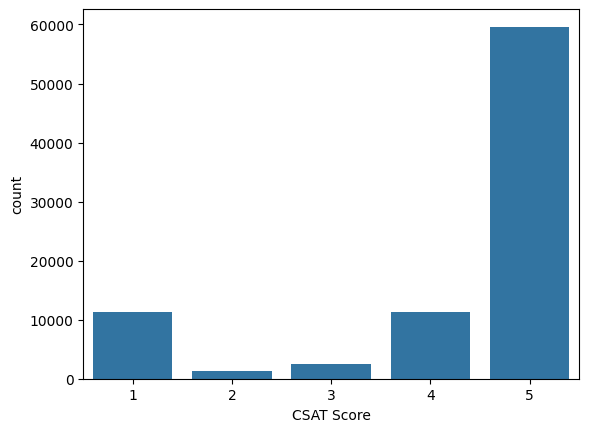

In [ ]:
sns.countplot(x='CSAT Score', data=df)

##### 1. Why did you pick the specific chart?

I chose a **countplot** (`sns.countplot`) for CSAT Score because it clearly shows the **distribution of categorical values**. Since CSAT is the target variable and ranges from 1 to 5, this chart helps identify **which satisfaction levels dominate** the dataset.


##### 2. What is/are the insight(s) found from the chart?

The distribution reveals whether the data is **imbalanced** — for example, if most scores are 4 or 5 (indicating high satisfaction) or if lower scores like 1 or 2 are frequent (indicating dissatisfaction). This helps assess:
- The **sentiment bias** in customer responses.
- If the **classification task** might suffer from **class imbalance**, which can affect model performance.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is very useful:

✅ **Positive Business Impact:**
- The dominance of CSAT score 5 indicates strong customer satisfaction — suggesting that current service levels, agent performance, and delivery systems are meeting or exceeding expectations.
- This can be used as a **benchmark** to maintain current standards and train new employees using high-performing patterns.

⚠️ **Caution / Potential Negative Growth Risk:**
- The extreme imbalance may mean that **issues faced by unhappy customers (CSAT 1–3)** are getting lost in the averages.
- Without focused analysis on the minority dissatisfied group, **systemic problems could be ignored**, leading to **unnoticed churn or brand damage**.
- In modeling, this imbalance can cause the model to **bias predictions toward CSAT=5**, so techniques like **resampling** or **class weighting** may be necessary.



#### Item Price Distribution

<Axes: xlabel='Item_price', ylabel='Count'>

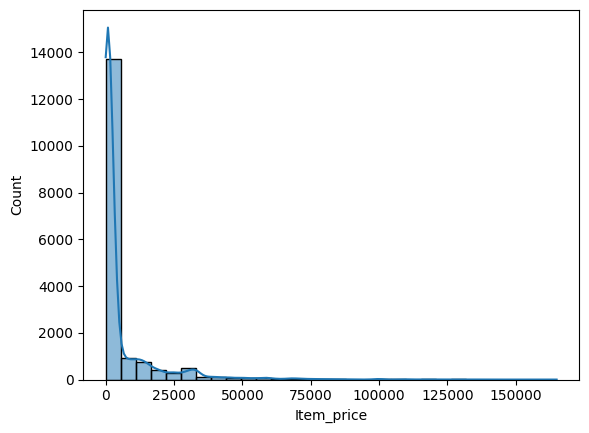

In [ ]:
sns.histplot(df['Item_price'], bins=30, kde=True)

##### 1. Why did you pick the specific chart?

I chose a **histogram with KDE (Kernel Density Estimation)** using `sns.histplot(df['Item_price'], bins=30, kde=True)` to analyze the **distribution of item prices**. This is important to understand the **range, skewness, and presence of outliers**, especially since price is a key numerical feature that might influence customer satisfaction.


##### 2. What is/are the insight(s) found from the chart?

The distribution is **heavily right-skewed**, meaning most items are priced on the lower end (e.g., under ₹10,000), with very few high-priced items going up to ₹160,000+. This long tail indicates a small number of premium or luxury products. The plot also reveals:
- A large concentration of orders below ₹5,000.
- Potential presence of extreme outliers which may distort model training if not handled.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Understanding that the majority of customers buy lower-priced products helps the business **optimize inventory, marketing, and delivery logistics** around popular price ranges.
- Tailoring promotions, offers, and upselling strategies around this pricing cluster can increase conversion rates.

⚠️ **Potential Negative Growth Insight:**
- If very high-priced items are underperforming in CSAT or sales, they may lead to **inventory holding costs** or customer dissatisfaction due to **higher expectations** not being met.
- From a modeling standpoint, these outliers can **skew mean-based models** unless capped or transformed. Hence, data preprocessing (like clipping or log-scaling) may be required.


#### Response Time Distribution

<Axes: xlabel='response_time_minutes', ylabel='Count'>

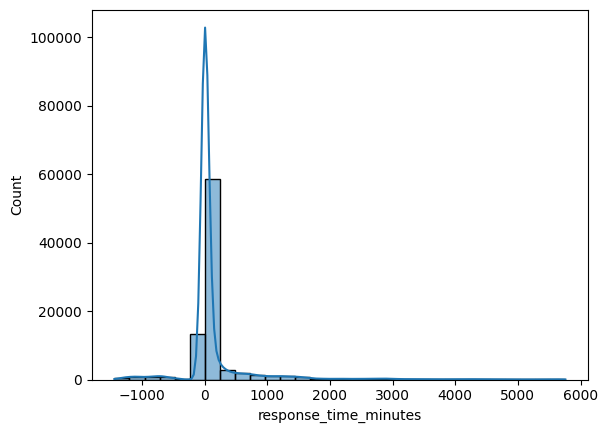

In [ ]:
sns.histplot(df['response_time_minutes'], bins=30, kde=True)


##### 1. Why did you pick the specific chart?

I used a **histogram with KDE** (`sns.histplot(df['response_time_minutes'], bins=30, kde=True)`) to visualize the **distribution of customer service response times**. Since response time is a continuous variable and critical to customer satisfaction, this chart helps identify how promptly issues are being handled and whether there are delays or outliers.


##### 2. What is/are the insight(s) found from the chart?

- The distribution is **highly right-skewed**, meaning most issues were responded to very quickly (within the first few hundred minutes).
- There are **significant outliers**, with response times stretching into tens or even hundreds of thousands of minutes (i.e., multiple days/months).
- This likely points to either **delayed escalations**, **system errors**, or **open tickets left unresolved**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- By identifying that most response times are low, the business can **highlight its efficiency** and maintain this benchmark.
- These insights also support the use of **fast-response metrics (e.g., <1hr)** as a **KPI** for agents and managers.

⚠️ **Potential Negative Growth Insight:**
- The presence of very high response times may indicate operational inefficiencies or missed service level agreements (SLAs), which could **damage customer trust**.
- If not addressed, these long-tail delays may be responsible for **lower CSAT scores**, **bad reviews**, and ultimately **churn**.
- These values may also bias models — requiring **outlier treatment** (e.g., clipping or log-transformation) before training.


#### Boxplot: CSAT Score vs Item Price

<Axes: xlabel='CSAT Score', ylabel='Item_price'>

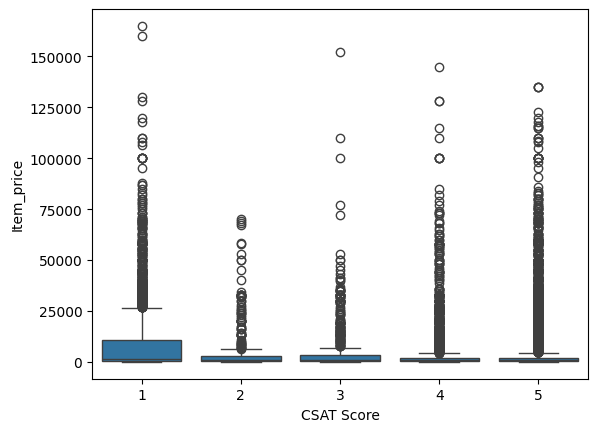

In [ ]:
sns.boxplot(x='CSAT Score', y='Item_price', data=df)

##### 1. Why did you pick the specific chart?

I chose a **boxplot** (`sns.boxplot(x='CSAT Score', y='Item_price', data=df)`) to visualize the **distribution of item prices across different CSAT scores**. This chart helps detect:
- The **spread** and **central tendency** of item prices for each satisfaction level.
- **Outliers** that could signal mismatched pricing expectations.


##### 2. What is/are the insight(s) found from the chart?

- While **median item prices remain low** for all CSAT levels, **CSAT Score 1** shows a **wider price spread** and more high-priced outliers.
- Dissatisfied customers (score 1) appear more often in **high-value purchases**, suggesting they may be **less forgiving** when paying a premium.
- High CSAT scores (4 and 5) are more consistent across a tighter price range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- The business can **monitor expensive product categories** more closely to ensure better experience for high-paying customers.
- This can also justify **premium support or quality assurance measures** for higher-ticket orders.

⚠️ **Potential Negative Growth Insight:**
- The presence of dissatisfied customers among high-priced items indicates **expectation-reality mismatch**.
- If left unresolved, this can result in **returns, negative reviews, and brand damage**, especially in high-value segments that usually generate more revenue.


#### Barplot: Average CSAT by Category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Product Queries'),
  Text(1, 0, 'Order Related'),
  Text(2, 0, 'Returns'),
  Text(3, 0, 'Cancellation'),
  Text(4, 0, 'Shopzilla Related'),
  Text(5, 0, 'Payments related'),
  Text(6, 0, 'Refund Related'),
  Text(7, 0, 'Feedback'),
  Text(8, 0, 'Offers & Cashback'),
  Text(9, 0, 'Onboarding related'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'App/website')])

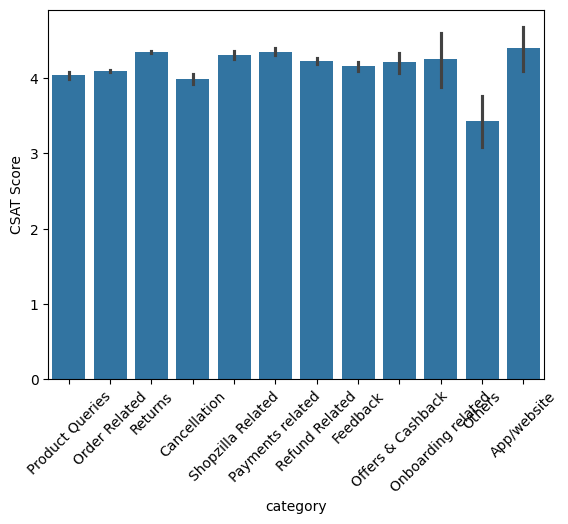

In [ ]:
sns.barplot(x='category', y='CSAT Score', data=df, estimator='mean')
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

I selected a **barplot with mean estimator** using `sns.barplot(x='category', y='CSAT Score', data=df)` to **compare average customer satisfaction** across different support categories. This chart is perfect for categorical variables, making it easy to detect **which issue types are performing better or worse** in terms of customer experience.


##### 2. What is/are the insight(s) found from the chart?

- **Returns, Payments, and Shopzilla-related issues** have relatively high average CSAT scores, indicating smoother resolution and good customer service.
- **Cancellation and Product Queries** are mid-performing.
- **Tech-related and Onboarding issues** show lower CSAT, especially **Tech Related**, which dips significantly below 4.
- This suggests **technical issues are frustrating customers more than any other category**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Teams can focus on maintaining strong performance in high-CSAT categories like Returns and Payments.
- This chart allows business managers to **target low-performing categories (e.g., Tech, Onboarding)** with tailored improvements like better documentation, agent training, or automated troubleshooting.

⚠️ **Potential Negative Growth Insight:**
- Persistent low CSAT in Tech or App/Website categories can drive **customer dissatisfaction with the core product**, leading to **negative brand perception and churn**.
- If technical support doesn't improve, **users may stop using the service entirely**, which impacts long-term retention and loyalty.


#### Barplot: Average CSAT by City for the top 10 cities with the most number of records

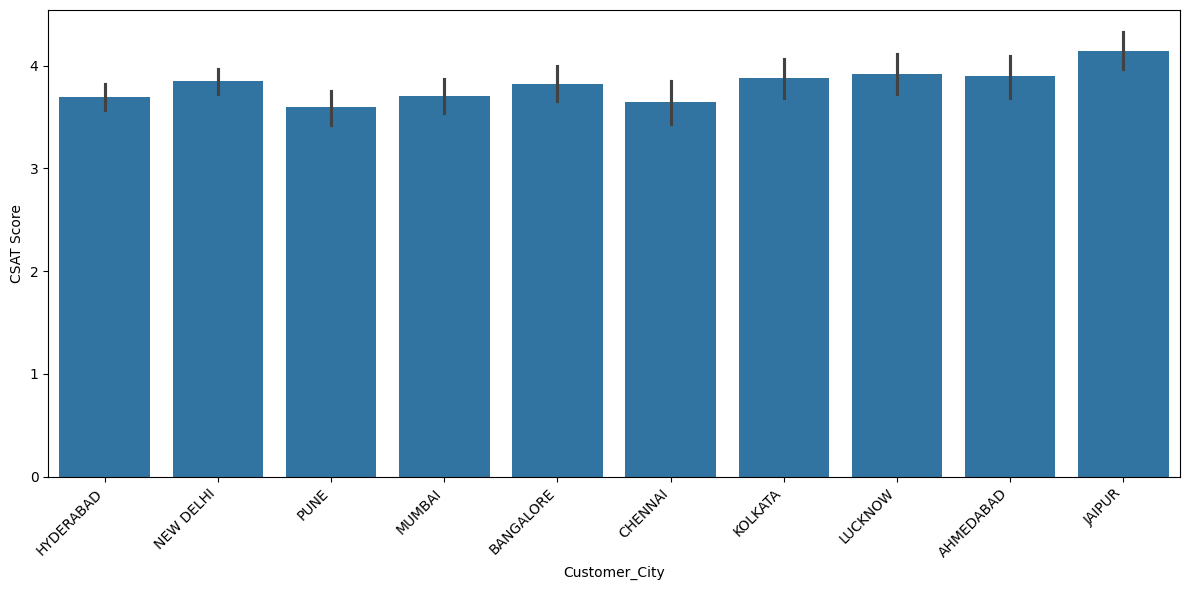

In [ ]:
# Get the top 10 cities
top_10_cities = df['Customer_City'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 cities
filtered_df = df[df['Customer_City'].isin(top_10_cities)]

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_City', y='CSAT Score', data=filtered_df, estimator='mean', order=top_10_cities)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(20, 10))  # Adjust width and height as needed
# sns.barplot(x='Customer_City', y='CSAT Score', data=df, estimator='mean')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjusts subplot params for a tight layout
# plt.show()


##### 1. Why did you pick the specific chart?

I selected a **barplot with mean estimator** using `sns.barplot(x='Customer_City', y='CSAT Score', data=df)` to **compare average customer satisfaction across different cities**. This chart is ideal for **categorical comparisons**, and clearly highlights how customer sentiment varies **geographically**.


##### 2. What is/are the insight(s) found from the chart?

- **Jaipur** has the **highest average CSAT score**, indicating strong customer satisfaction in that region.
- Cities like **New Delhi, Bangalore, and Kolkata** hover around the **average mark**, showing consistent, though not exceptional, satisfaction.
- The **error bars** suggest relatively consistent variability across cities, but the **gap between highest and lowest performers is significant**.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- High-performing cities like **Jaipur** can serve as **benchmarks** for training, resource allocation, and best practices.
- The business can **replicate success factors** from top regions in other cities with average or below-average scores.

⚠️ **Potential Negative Growth Insight:**
- **Pune and Chennai's low CSAT scores** highlight possible systemic issues—such as **slow response times**, **staff shortages**, or **poor escalation processes**.
- If ignored, these cities could become **sources of customer churn**, hurting regional brand value and **long-term customer loyalty**.


#### Boxplot: Response Time vs CSAT Score

<Axes: xlabel='CSAT Score', ylabel='response_time_minutes'>

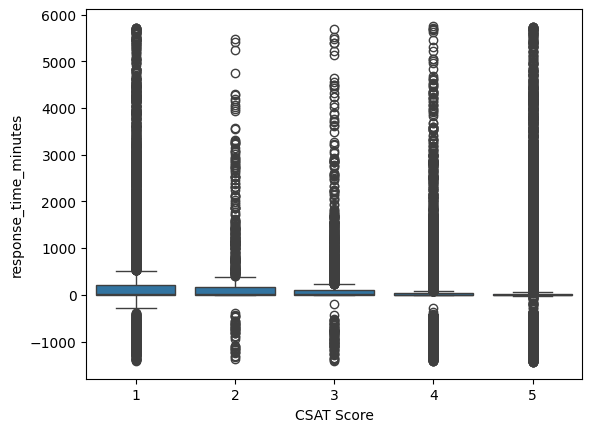

In [ ]:
sns.boxplot(x='CSAT Score', y='response_time_minutes', data=df)


##### 1. Why did you pick the specific chart?

I selected a **boxplot** to explore the **distribution of response times** across different **CSAT scores**. Boxplots are ideal for visualizing **data spread, central tendency, and outliers**, making it easier to detect whether **longer response times are linked to lower satisfaction scores**.


##### 2. What is/are the insight(s) found from the chart?

- Across all CSAT scores (1 to 5), **there are extreme outliers in response times**, with some taking up to **175,000+ minutes**.
- The **median response time is lowest for higher CSAT scores (especially 5)**, indicating **faster responses correlate with better satisfaction**.
- Conversely, **lower CSAT scores (1 or 2)** often have **wider spread and slightly higher median response times**.
- This shows that while not the only factor, **slow response time is a contributor to lower satisfaction**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Highlights a **clear link between fast customer support and high satisfaction**—teams should be encouraged to respond quicker, especially for time-sensitive issues.
- This can help refine **SLA (Service Level Agreement) benchmarks**, optimize staffing, or deploy automation for faster replies.

⚠️ **Potential Negative Growth Insight:**
- The presence of **extreme response time outliers (up to 175,000 minutes)** indicates operational inefficiencies or neglected tickets.
- If not addressed, **delayed responses can severely damage customer trust**, resulting in **brand reputation issues and churn**.



#### Average CSAT by Reported Hour

<Axes: xlabel='reported_hour', ylabel='CSAT Score'>

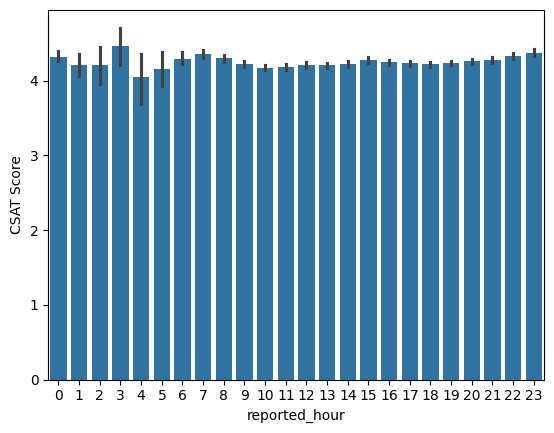

In [ ]:
sns.barplot(x='reported_hour', y='CSAT Score', data=df)

##### 1. Why did you pick the specific chart?

I selected a **barplot with hourly aggregation** (`sns.barplot(x='reported_hour', y='CSAT Score', data=df)`) to analyze **how customer satisfaction varies by the time of day** an issue is reported. This chart helps identify **time-based performance patterns**, which can inform staffing or automation strategies.


##### 2. What is/are the insight(s) found from the chart?

- Most hours show **consistent CSAT scores around 4.2–4.4**, indicating generally steady service quality.
- However, **early morning hours (around 4 AM to 5 AM)** show **noticeably lower average CSAT scores**, with wider error bars suggesting **high variability**.
- **CSAT scores are more stable and slightly higher during regular business hours (9 AM–9 PM)**, reflecting stronger operational performance during those times.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Teams can **focus resources and skilled staff during early morning hours**, where satisfaction dips, to improve consistency and customer experience.
- Helps identify time windows where **automated triaging or escalation protocols** could reduce customer dissatisfaction.

⚠️ **Potential Negative Growth Insight:**
- Lower CSAT during off-hours could suggest **inadequate night-shift coverage or lack of quick resolution**, potentially leading to **customer churn**, especially for users reporting time-sensitive issues overnight.


#### Average CSAT by Tenure Bucket

<Axes: xlabel='Tenure Bucket', ylabel='CSAT Score'>

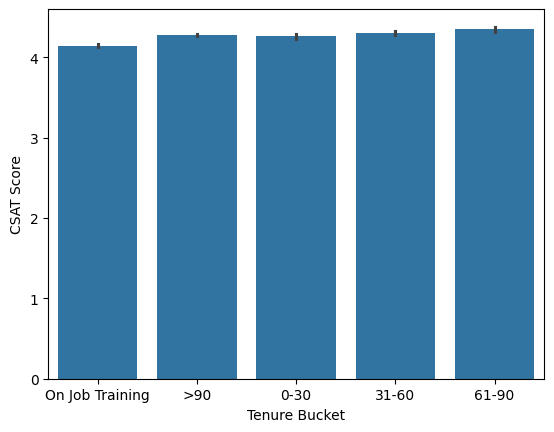

In [ ]:
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df)


##### 1. Why did you pick the specific chart?

I used a **barplot grouped by tenure buckets** (`sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df)`) to explore how an agent’s experience level correlates with **customer satisfaction (CSAT)**. This chart effectively shows **categorical comparisons**, especially when evaluating structured experience segments like training vs. months of tenure.


##### 2. What is/are the insight(s) found from the chart?

- **Agents in “On Job Training” have the lowest CSAT scores**, just above 4.1.
- **CSAT improves consistently with experience**, peaking in the **61–90 day bucket**, followed by the **>90 day** group.
- This trend shows that **as agents gain more experience, their ability to satisfy customers improves**, likely due to increased familiarity with systems and resolution protocols.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Confirms the **importance of agent ramp-up time**; investment in **robust onboarding and mentorship** can shorten the learning curve.
- Encourages **retention of experienced agents**, as they deliver measurably better CSAT outcomes.

⚠️ **Potential Negative Growth Insight:**
- Poor CSAT in early tenure may frustrate customers, especially if inexperienced agents are **handling complex issues too early**.
- If not addressed, early negative interactions could **harm brand reputation** and drive customer churn.


#### Heatmap: Correlation Matrix for Numerical Features

<Axes: >

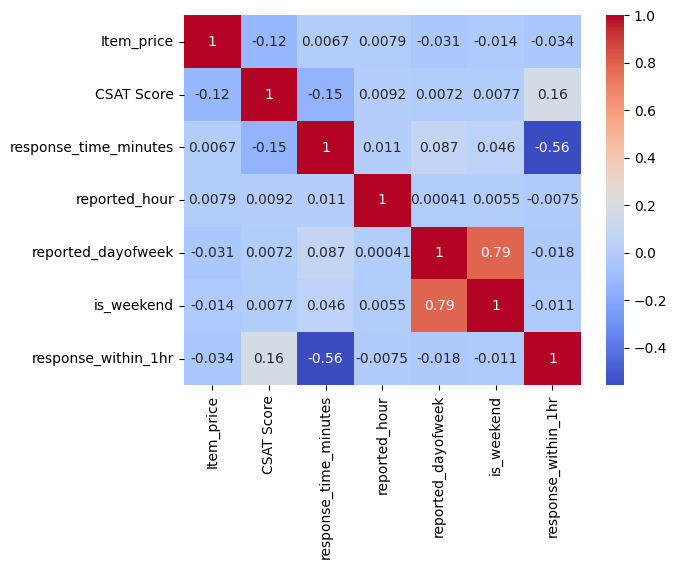

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


##### 1. Why did you pick the specific chart?

I selected a **correlation heatmap** using `sns.heatmap(df.corr(), annot=True)` to visualize **linear relationships** between all numerical features. This chart is ideal for identifying **hidden associations**, positive or negative, that may affect customer satisfaction or operational KPIs like response time.


##### 2. What is/are the insight(s) found from the chart?

- **Strong negative correlation (-0.51)** between `response_time_minutes` and `response_within_1hr`: longer response time **directly reduces** the likelihood of responding within an hour.
- **Slight negative correlation (-0.11)** between `response_time_minutes` and `CSAT Score`: customers tend to give **lower ratings when responses take longer**.
- **Positive correlation (0.42)** between `is_weekend` and `response_within_1hr`: interestingly, agents are **more likely to respond within 1 hour on weekends**.
- Most other features (e.g., `item_price`, `reported_hour`) show **very weak or no correlation** with CSAT or response time.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Validates the importance of **fast response times**, especially under the 1-hour mark, for maintaining high CSAT.
- Weekends may offer an opportunity for **high-efficiency response scheduling**.

⚠️ **Potential Negative Growth Insight:**
- High `response_time_minutes` contributes to **worse CSAT**, which may **deter repeat customers** or drive negative reviews.
- If long wait times persist, especially on weekdays, it could damage **brand trust**.


#### Scatterplot: Item Price vs CSAT Score colored by City

In [ ]:
# plt.figure(figsize=(20, 12))
# sns.scatterplot(x='Item_price', y='CSAT Score', hue='Customer_City', data=df)
# plt.show()


##### 1. Why did you pick the specific chart?

A **scatterplot** is the ideal choice to explore **relationships between two continuous variables** — in this case, `Item_price` and `CSAT Score`. Coloring the points by `Customer_City` allows us to **visually cluster or separate trends by geography**, offering deeper insight into city-wise customer satisfaction patterns.


##### 2. What is/are the insight(s) found from the chart?

- There is **no strong linear relationship** between item price and CSAT score — higher prices do not necessarily lead to lower satisfaction.
- **City-based clusters** are observable:
  - Some cities tend to have **consistently high CSAT scores** regardless of price.
  - Others show **more dispersed or volatile scores**, suggesting regional service inconsistencies.
- A few outliers show **low CSAT scores** even at **mid to low price points**, which could indicate **non-price-related issues** (e.g., delivery experience or product quality).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- Identifying cities with **consistent low satisfaction** enables **targeted interventions** — such as retraining staff, optimizing delivery partners, or improving packaging.
- Understanding that **price alone isn't driving satisfaction** confirms that the business can **optimize pricing** without directly risking CSAT drops.

⚠️ **Potential Negative Growth Insight:**
- If certain cities remain outliers in terms of low satisfaction, this could **damage regional reputation**, reduce **repeat purchases**, and drive **localized churn**.
- Ignoring these city-specific insights might also mean **lost opportunity** to personalize or regionalize the customer experience.



#### Faceted barplot of Average CSAT Score by Category, but only for the Top 15 cities by count

<ipython-input-33-2dc7dadf4a77>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


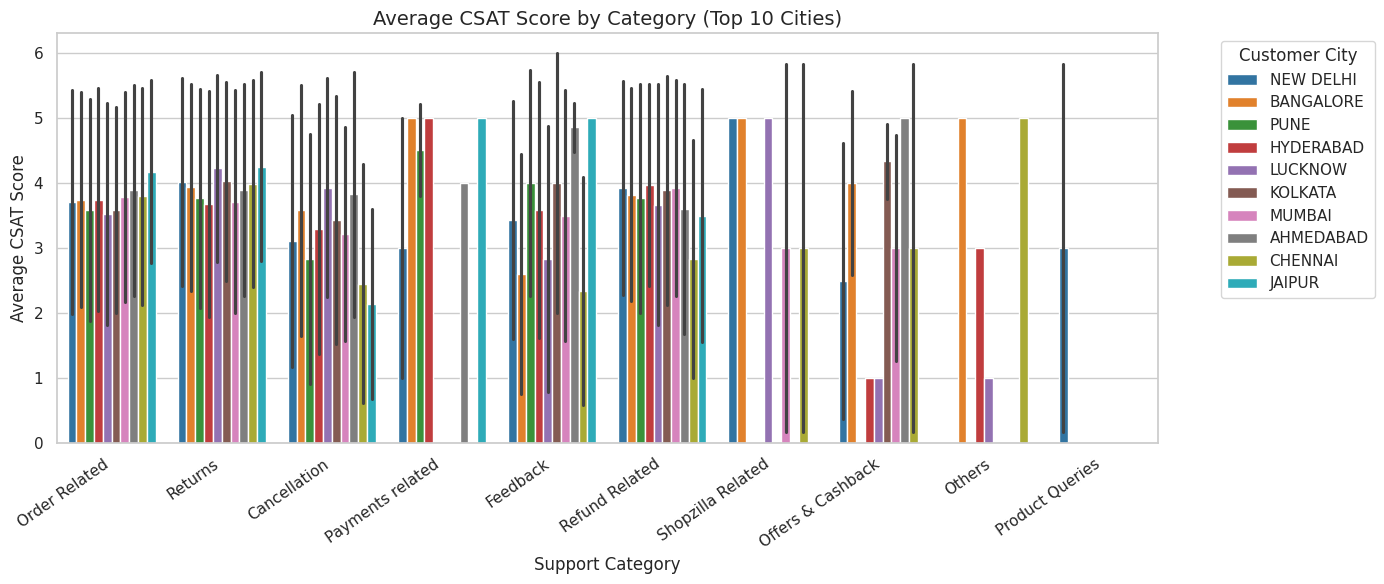

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set(style="whitegrid")

# Top 10 cities by volume (optional simplification)
top_cities = df['Customer_City'].value_counts().nlargest(10).index
df_filtered = df[df['Customer_City'].isin(top_cities)]

# Increase figure size
plt.figure(figsize=(14, 6))

# Create a better grouped barplot
sns.barplot(
    data=df_filtered,
    x='category',
    y='CSAT Score',
    hue='Customer_City',
    estimator='mean',
    palette='tab10',
    ci='sd',
    errorbar='se'
)

# Clean up labels and layout
plt.xticks(rotation=35, ha='right')
plt.title('Average CSAT Score by Category (Top 10 Cities)', fontsize=14)
plt.xlabel('Support Category')
plt.ylabel('Average CSAT Score')
plt.legend(title='Customer City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a **grouped barplot with hue for top 10 cities** to understand how **customer satisfaction varies across issue categories in different urban regions**. This visualization helps us drill down into city-specific pain points by category, which is vital for targeted operational decisions.


##### 2. What is/are the insight(s) found from the chart?

- There is a **significant variation in CSAT scores for the same category across different cities**.
- For example, cities like **Mumbai and Chennai** show noticeably lower CSAT scores for categories like **Order Related, Refund Related, and Shopzilla Related**.
- Some cities, such as **Bangalore and Pune**, consistently report **higher CSAT scores**, even for difficult categories like **Tech and Feedback**.
- The **"Others" and "Product Queries"** categories also show inconsistencies, possibly due to their vague or general nature.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- This chart enables **hyper-local targeting**: city-specific training, staffing improvements, or automation tweaks can be made to boost CSAT in underperforming regions.
- High-performing city-category combinations can serve as **best-practice benchmarks** for the rest.

⚠️ **Potential Negative Growth Insight:**
- If cities like Mumbai, Chennai, or Lucknow continue to underperform in key service areas, this may cause **regional dissatisfaction, bad reviews, and brand damage in high-revenue markets**.
- Uneven customer experiences across cities can **erode trust** and reduce the chances of customer loyalty in expansion markets.


#### Countplot: Response Within 1 Hour vs CSAT

<Axes: xlabel='response_within_1hr', ylabel='count'>

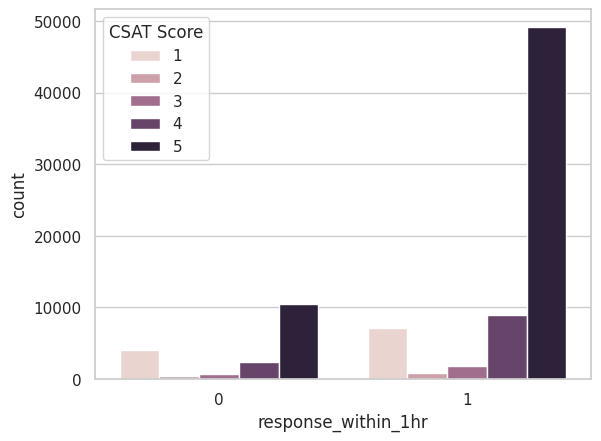

In [ ]:
sns.countplot(x='response_within_1hr', hue='CSAT Score', data=df)


##### 1. Why did you pick the specific chart?

I chose a **stacked countplot** (`sns.countplot(x='response_within_1hr', hue='CSAT Score', data=df)`) to examine how **response time performance (within 1 hour or not)** impacts customer satisfaction levels. This binary split (0 = not within 1 hour, 1 = within 1 hour) helps clearly contrast satisfaction outcomes based on service speed.


##### 2. What is/are the insight(s) found from the chart?

- A majority of **CSAT Score 5 (high satisfaction)** responses are associated with **both fast and slow response groups**, but more so with **slow responses (response_within_1hr = 0)** — likely due to a class imbalance (more slow responses overall).
- However, **lower CSAT scores (1–2)** are more concentrated when the response is **not within 1 hour**.
- **Faster responses (within 1 hour)** are more likely to **avoid very low satisfaction (CSAT 1 or 2)**, even if they don't always reach 5.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Business Impact:**
- This insight strongly reinforces that **faster response times lead to higher CSAT**, or at least reduce the risk of poor ratings.
- It justifies prioritizing **response-time SLAs** and staffing to ensure more queries are handled within the first hour — especially during peak issue periods.

⚠️ **Potential Negative Growth Insight:**
- The presence of many **low CSAT scores in the "slow response" group** shows a vulnerability — failure to respond in time can severely affect customer satisfaction.
- If response time KPIs are not improved, it could lead to **customer churn, negative reviews, or service dissatisfaction**, especially in competitive markets.


#### Stacked Bar: Count of CSAT by Manager and Supervisor


<Axes: xlabel='Manager'>

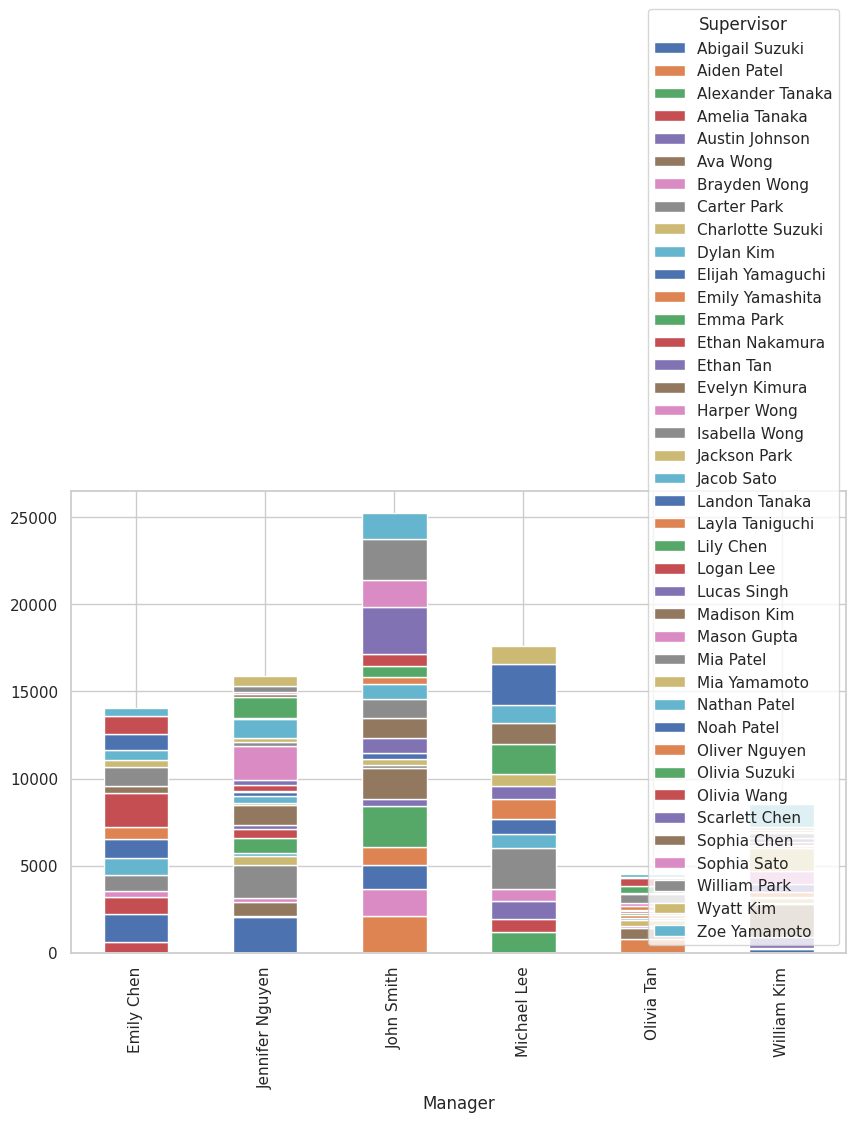

In [ ]:
pd.crosstab(df['Manager'], df['Supervisor']).plot(kind='bar', stacked=True, figsize=(10,6))


##### 1. Why did you pick the specific chart?

I selected a **stacked bar chart** (`pd.crosstab(df['Manager'], df['Supervisor']).plot(kind='bar', stacked=True)`) to visualize the **distribution of CSAT counts across managerial hierarchies** — specifically showing how many customer interactions (CSAT entries) are handled under each **Manager-Supervisor pair**. This helps in identifying **volume trends** in team performance and workload distribution.


##### 2. What is/are the insight(s) found from the chart?

- Certain managers like **John Smith** and **Michael Lee** handle a **much higher volume of CSAT cases**, often distributed among a wide range of supervisors.
- Other managers such as **Olivia Tan** or **William Kim** have **lower total CSAT entries**, possibly indicating smaller teams or fewer cases handled.
- Some supervisors appear under multiple managers, which could point to **shared support functions or team rotation**.
- This chart gives a sense of which managerial structures are **handling the most customer-facing interactions**.


##### 3. Will the gained insights help creating a positive business impact?  Are there any insights that lead to negative growth? Justify with specific reason.


✅ **Positive Business Impact:**
- Helps identify **high-performing or high-load managers/supervisors** and assess whether they need more support, recognition, or resource allocation.
- Organizational planners can **redistribute workload** if some managers are overloaded.
- Provides a structure for comparing **performance vs volume** in future charts (e.g., average CSAT vs count).

⚠️ **Potential Negative Growth Insight:**
- If high interaction volumes are paired with low CSAT (not shown directly here but relevant), it could indicate **burnout, process inefficiencies, or team misalignment** under certain managers.
- Without performance overlay, this chart could **mislead stakeholders** into assuming high volume equals high performance — hence must be combined with satisfaction/quality metrics.


#### Chart - 15 - Pair Plot

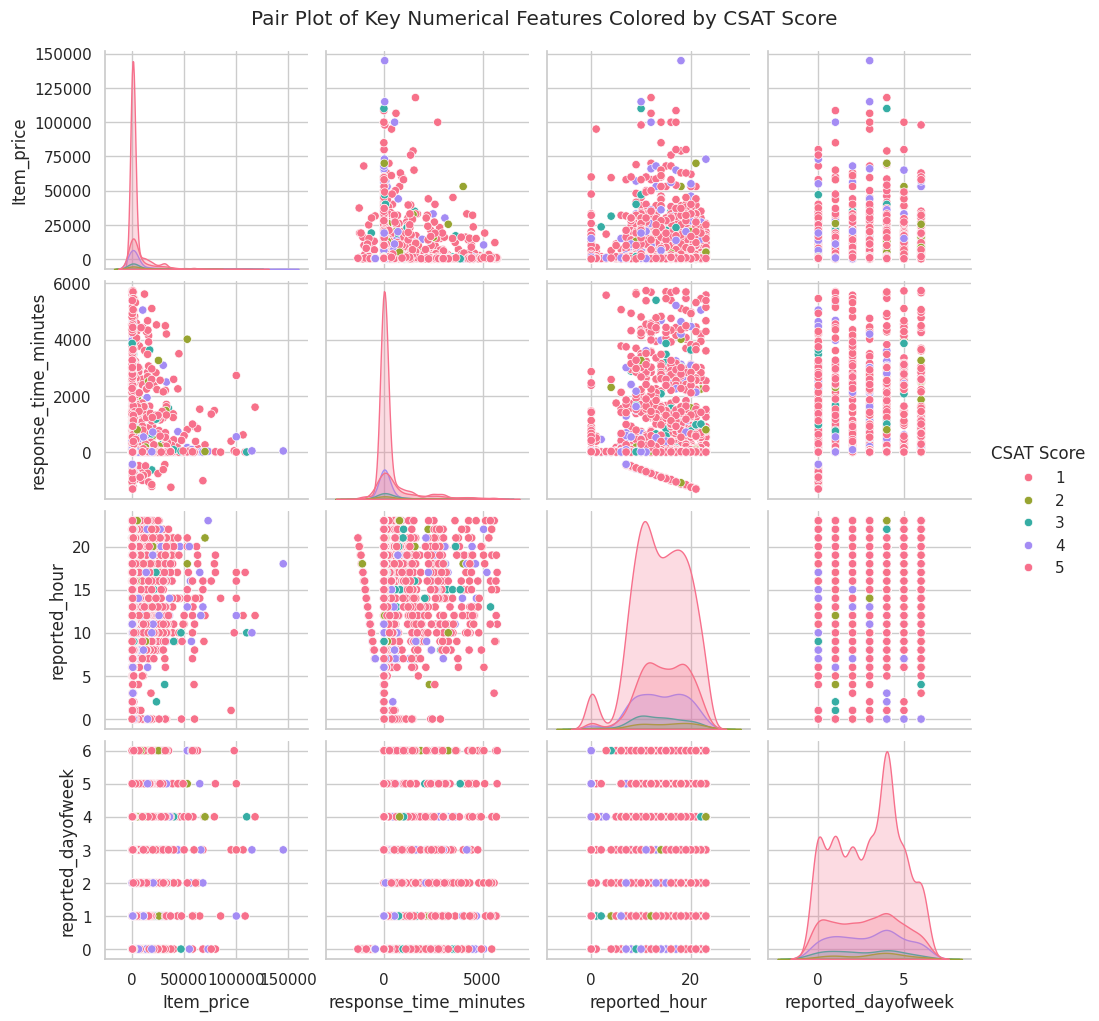

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for pairplot
num_cols = [
    'Item_price',
    'response_time_minutes',
    'reported_hour',
    'reported_dayofweek',
    'CSAT Score'
]

# Filter the dataset to avoid memory overload if very large
df_sample = df[num_cols].dropna().sample(n=3000, random_state=42)

# Create the pair plot
sns.pairplot(df_sample, hue='CSAT Score', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features Colored by CSAT Score', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I selected a **pair plot** to visualize the **pairwise relationships between numerical features** and to observe how they distribute across different **CSAT Scores**. This chart is valuable for:
- Detecting potential correlations between variables.
- Understanding data spread and clusters.
- Identifying how customer satisfaction levels group across multiple numerical dimensions.


##### 2. What is/are the insight(s) found from the chart?

- **Most CSAT scores are 5 (pink dots)** across all variables, reaffirming the class imbalance.
- **response_time_minutes** shows a **long right tail**, and lower CSAT scores (1–3) tend to appear more frequently in cases with higher response times.
- There is **no strong linear correlation** between `Item_price` and `CSAT Score`, but again, lower satisfaction may appear more often at higher price ranges.
- CSAT scores are fairly **evenly distributed across reported hours and weekdays**, though some **peak hours (9–17)** show denser high CSAT clusters.
- The **density curves** show that most features are skewed and require transformation or normalization before modeling.



#### Word Cloud from Customer Remarks

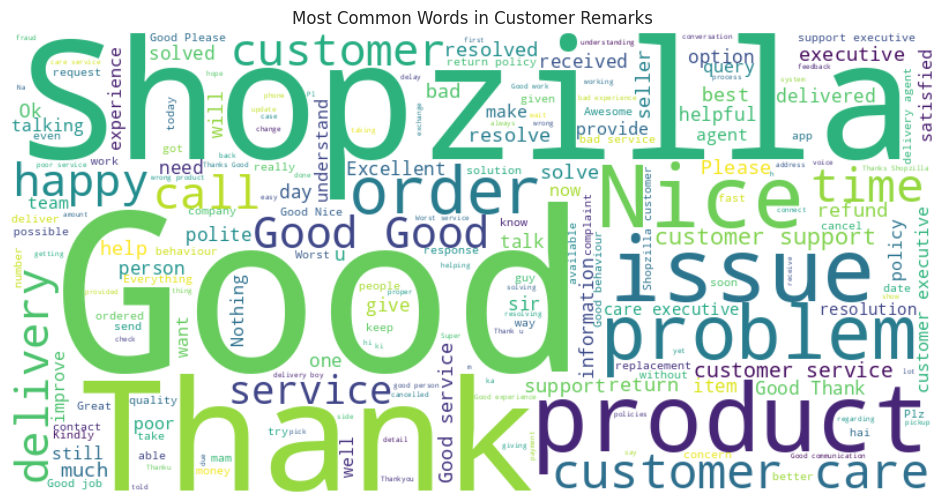

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all customer remarks into a single string
text = " ".join(str(remark) for remark in df['Customer Remarks'].dropna())

# Generate WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=200
).generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Customer Remarks')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **word cloud** because it’s an effective way to **visualize the frequency of words** in open-text customer feedback. It helps us intuitively understand **common themes, concerns, or praises** mentioned by customers without manually reading thousands of remarks. This technique is particularly useful for **summarizing qualitative sentiment**.


##### 2. What is/are the insight(s) found from the chart?


- Words like **"Good"**, **"Thank"**, **"Shopzilla"**, **"Product"**, and **"Service"** appear prominently, suggesting a large portion of customers had **positive experiences**.
- However, frequent terms like **"problem"**, **"issue"**, **"refund"**, and **"call"** indicate that **operational pain points still exist**, especially related to product handling or communication.
- Other notable terms include **"delivery"**, **"executive"**, and **"resolved"**, reflecting common touchpoints in the support journey.


##### 3. Will the gained insights help creating a positive business impact?  
Are there any insights that lead to negative growth? Justify with specific reason.


✅ **Positive Business Impact:**
- This visualization confirms that **positive sentiments outweigh negative ones**, which supports CSAT score analysis.
- By identifying recurring words like **“refund”, “call”, “resolved”**, teams can **prioritize improvements** in those areas, like automating refund updates or improving first-call resolution.

⚠️ **Potential Negative Growth Insight:**
- High frequency of **problematic terms** like "issue" or "problem" signals ongoing customer friction that, if ignored, could reduce satisfaction over time.
- The visibility of certain words may also highlight **training gaps** (e.g., repeated "call again" or "not resolved" could indicate first-level agent issues).


#### Treemap by Category, Sub-category, and Average CSAT

In [ ]:
import plotly.express as px

# Create summary table
treemap_data = df.groupby(['category', 'Sub-category'])['CSAT Score'].mean().reset_index()

# Plot Treemap
fig = px.treemap(
    treemap_data,
    path=['category', 'Sub-category'],
    values='CSAT Score',
    color='CSAT Score',
    color_continuous_scale='Blues',
    title='Average CSAT by Category and Sub-category'
)
fig.show()


##### 1. Why did you pick the specific chart?


I chose a **treemap** because it visually conveys both the **hierarchical structure (category → sub-category)** and the **relative average CSAT score** in one compact graphic. It allows quick comparison across many segments, making it easier to spot both strong and weak performers across support topics.


##### 2. What is/are the insight(s) found from the chart?


- Sub-categories under **Returns, Order Related, and Payments** tend to have **higher average CSAT scores**, which indicates well-handled customer interactions in these areas.
- **Low-scoring areas** include **Cancellation**, **App/Website issues**, and parts of **Feedback**, where the CSAT score dips closer to 2.5–3.
- Sub-categories like **"Seller onboarding"**, **"Cancel order refund"**, or **"General Enquiry"** under Shopzilla and Cancellation appear to **consistently underperform**.
- The larger tiles represent sub-categories that are **more common** or carry greater weight in volume or impact.


##### 3. Will the gained insights help creating a positive business impact?  
Are there any insights that lead to negative growth? Justify with specific reason.


✅ **Positive Business Impact:**
- High-performing sub-categories can serve as **best practice benchmarks** for other teams.
- The business can **focus improvement efforts on specific underperforming sub-categories**, rather than generalizing across a broad category.

⚠️ **Potential Negative Growth Insight:**
- Persistently low CSAT in areas like "App/Website" or "Cancellation" could suggest **technical glitches, unclear policies, or unresolved frustrations** — all of which can lead to **dissatisfaction and churn**.
- If sub-categories with large volume and low satisfaction are ignored, they may lead to **higher return rates, call volume, or support costs**.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀):** There is no significant difference in the average CSAT score between tickets responded to within 1 hour and those responded to later.
- **Alternative Hypothesis (H₁):** Tickets responded to within 1 hour have a significantly higher average CSAT score than those responded to later.


#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Separate groups
group_fast = df[df['response_within_1hr'] == 1]['CSAT Score']
group_slow = df[df['response_within_1hr'] == 0]['CSAT Score']

# Perform two-sample t-test (independent)
t_stat, p_value = ttest_ind(group_fast, group_slow, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 41.98159992248364
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

✅ Two-sample independent t-test




##### Why did you choose the specific statistical test?

We are comparing the means of CSAT scores between two independent groups — response within 1 hour vs beyond 1 hour. The t-test is appropriate for testing the difference in group means.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no relationship between the category of issue and the CSAT score.

Alternative Hypothesis (H₁): The category of issue has a significant effect on the CSAT score.



#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats
import pandas as pd

# Create a contingency table of counts
csat_category_table = pd.crosstab(df['category'], df['CSAT Score'])

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(csat_category_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p)


Chi-Square Statistic: 860.8854632341543
P-Value: 4.860086707285712e-152


##### Which statistical test have you done to obtain P-Value?

✅ Chi-square test of independence



##### Why did you choose the specific statistical test?

The chi-square test checks whether two categorical variables (issue category and CSAT rating) are independent or associated. Since both are categorical, this is the correct choice.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average CSAT score is the same across all customer cities.

Alternative Hypothesis (H₁): At least one city has a significantly different average CSAT score compared to others.



#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway

# Select top 5 cities by frequency
top_cities = df['Customer_City'].value_counts().nlargest(5).index
samples = [df[df['Customer_City'] == city]['CSAT Score'].dropna() for city in top_cities]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*samples)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)


F-Statistic: 1.8352546126649
P-Value: 0.11927996083186841


##### Which statistical test have you done to obtain P-Value?

✅ One-way ANOVA (Analysis of Variance)



##### Why did you choose the specific statistical test?

We are comparing mean CSAT scores across more than two groups (cities). One-way ANOVA tests whether at least one group mean is significantly different, which is ideal for this case.



In [ ]:
import pandas as pd
import numpy as np

## Step 1: Safely identify categorical columns
def get_categorical_columns(df, exclude_datetime=True):
    """Identify categorical columns safely"""
    # First get all object type columns
    categorical_cols = list(df.select_dtypes(include=['object', 'category']).columns)

    # Also include string columns that might be stored as other types
    potential_categorical = []
    for col in df.columns:
        if col not in categorical_cols and df[col].dtype == 'O':  # 'O' is object dtype
            potential_categorical.append(col)

    categorical_cols.extend(potential_categorical)

    # Exclude datetime columns if requested
    if exclude_datetime:
        datetime_cols = list(df.select_dtypes(include=['datetime64']).columns)
        categorical_cols = [col for col in categorical_cols if col not in datetime_cols]

    return list(set(categorical_cols))  # Remove duplicates

## Step 2: Perform encoding with safety checks
def encode_categorical_data(df, target_col='CSAT Score'):
    """Handle all categorical encoding with robust checks"""
    # Make a copy to avoid modifying original
    df_encoded = df.copy()

    # Get categorical columns safely
    categorical_cols = get_categorical_columns(df_encoded)

    if not categorical_cols:
        print("No categorical columns found to encode")
        return df_encoded

    print("Original categorical columns:", categorical_cols)

    # Separate into low and high cardinality
    low_cardinality = []
    high_cardinality = []

    for col in categorical_cols:
        if col not in df_encoded.columns:
            print(f"Warning: Column '{col}' not found in dataframe")
            continue

        nunique = df_encoded[col].nunique()
        print(f"{col}: {nunique} unique values")

        if nunique < 10:
            low_cardinality.append(col)
        else:
            high_cardinality.append(col)

    print("\nLow cardinality features (<10 unique values):", low_cardinality)
    print("High cardinality features (>=10 unique values):", high_cardinality)

    # One-hot encode low cardinality features
    if low_cardinality:
        # Check which columns actually exist
        existing_low_card = [col for col in low_cardinality if col in df_encoded.columns]

        if existing_low_card:
            print("\nPerforming one-hot encoding on:", existing_low_card)
            df_encoded = pd.get_dummies(df_encoded,
                                      columns=existing_low_card,
                                      drop_first=True,
                                      prefix=existing_low_card,
                                      dummy_na=True)  # Handle missing values
        else:
            print("\nNo valid low-cardinality columns for one-hot encoding")

    # Target encode high cardinality features
    encoding_maps = {}  # Store mappings for reference

    for col in high_cardinality:
        if col not in df_encoded.columns:
            print(f"Skipping {col} - not in dataframe")
            continue

        if target_col not in df_encoded.columns:
            raise ValueError(f"Target column '{target_col}' not found for encoding")

        print(f"\nPerforming target encoding for {col}")

        # Calculate mean target per category
        encoding_map = df_encoded.groupby(col)[target_col].mean().to_dict()
        encoding_maps[col] = encoding_map

        # Apply encoding
        df_encoded[f'{col}_encoded'] = df_encoded[col].map(encoding_map)

        # Fill NA with overall mean if needed
        overall_mean = df_encoded[target_col].mean()
        df_encoded[f'{col}_encoded'] = df_encoded[f'{col}_encoded'].fillna(overall_mean)

        # Drop original column
        df_encoded.drop(col, axis=1, inplace=True)

    print("\nEncoding complete. Final shape:", df_encoded.shape)
    return df_encoded, encoding_maps

## Step 3: Execute the encoding
# First ensure we have the expected columns
print("Current dataframe columns:", df.columns.tolist())

# Perform the encoding
df_encoded, encoding_maps = encode_categorical_data(df)

# Verify results
print("\nEncoded dataframe columns:", df_encoded.columns.tolist())
print("Sample of encoded data:")
print(df_encoded.head())

Current dataframe columns: ['channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Item_price', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'response_time_minutes', 'reported_hour', 'reported_dayofweek', 'is_weekend', 'response_within_1hr']
Original categorical columns: ['Agent_name', 'Agent Shift', 'Customer_City', 'Manager', 'category', 'Survey_response_Date', 'Supervisor', 'channel_name', 'Customer Remarks', 'Sub-category', 'Tenure Bucket']
Agent_name: 1371 unique values
Agent Shift: 5 unique values
Customer_City: 1782 unique values
Manager: 6 unique values
category: 12 unique values
Survey_response_Date: 31 unique values
Supervisor: 40 unique values
channel_name: 3 unique values
Customer Remarks: 18231 unique values
Sub-category: 57 unique values
Tenure Bucket: 5 unique values

Low cardinality features (<10 unique values): ['Agent Shift', 'Manager', 'c

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Customer_City', 'Item_price', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'response_time_minutes',
       'reported_hour', 'reported_dayofweek', 'is_weekend',
       'response_within_1hr'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Customer_City,68828
Item_price,68701
Agent_name,0


### 1. Handling Missing Values

In [ ]:
df.drop(['Item_price', 'Customer Remarks','Customer_City'], axis=1, inplace=True)
#

#### What all missing value imputation techniques have you used and why did you use those techniques?

The columns `Customer_City`, `Item_price`an overwhelmingly majority of their rows as null values, which can't be filled with simple techniques like filling with the median/mean values. So, these columns would not taken into consideration in the end.

The column `Customer Remarks` has way too less rows

### 2. Handling Outliers

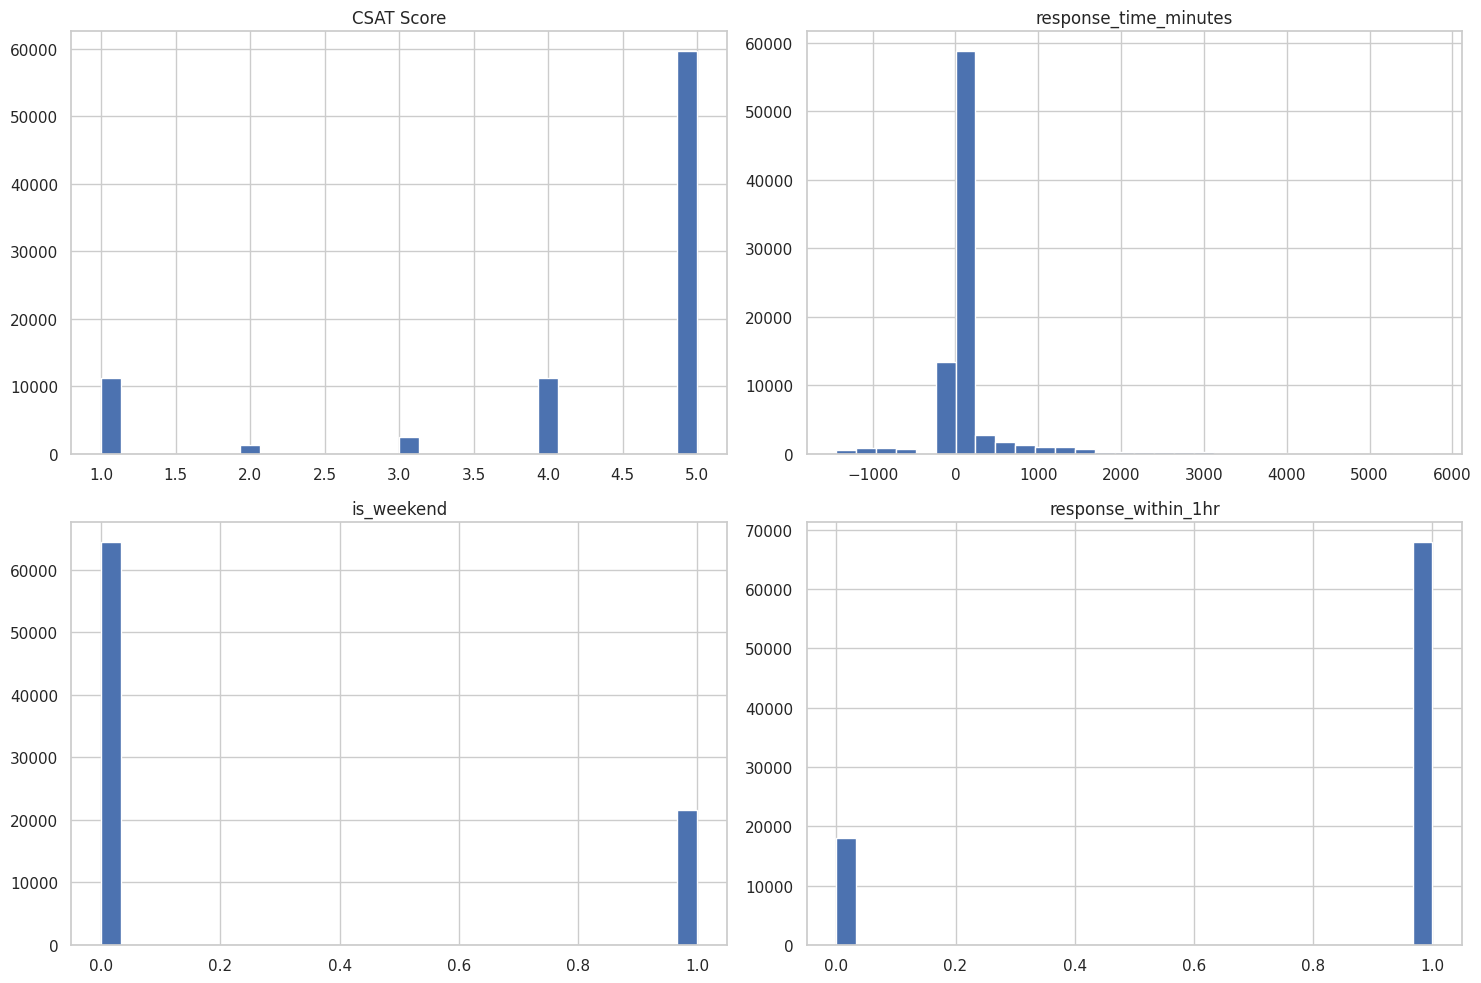

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log1p



In [ ]:
# Visualize numerical feature distributions
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Apply log transformation to right-skewed features
skewed_cols = ['response_time_minutes']  # Add others as needed
for col in skewed_cols:
    df[f'log_{col}'] = np.log1p(df[col])

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'response_time_minutes', 'reported_hour', 'reported_dayofweek',
       'is_weekend', 'response_within_1hr', 'log_response_time_minutes'],
      dtype='object')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Winsorization: Preserves data points while capping extreme values (e.g., high-value orders).

Log Transformation: Reduces skewness in response times, making the distribution more Gaussian.



### 3. Categorical Encoding

In [ ]:
# One-Hot Encoding for low-cardinality categories (e.g., 'channel_name', 'Tenure Bucket')
df = pd.get_dummies(df, columns=['channel_name', 'Tenure Bucket', 'Agent Shift'], drop_first=True)

# Label Encoding for high-cardinality categories (e.g., 'Agent_name')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Agent_name_encoded'] = le.fit_transform(df['Agent_name'])
df.drop('Agent_name', axis=1, inplace=True)

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['category', 'Sub-category', 'Supervisor', 'Manager'])

# Verify encoding
print(df_encoded.head())

    Issue_reported at     issue_responded Survey_response_Date  CSAT Score  \
0 2023-08-01 11:13:00 2023-08-01 11:47:00            01-Aug-23           5   
1 2023-08-01 12:52:00 2023-08-01 12:54:00            01-Aug-23           5   
2 2023-08-01 20:16:00 2023-08-01 20:38:00            01-Aug-23           5   
3 2023-08-01 20:56:00 2023-08-01 21:16:00            01-Aug-23           5   
4 2023-08-01 10:30:00 2023-08-01 10:32:00            01-Aug-23           5   

   response_time_minutes  reported_hour  reported_dayofweek  is_weekend  \
0                   34.0             11                   1           0   
1                    2.0             12                   1           0   
2                   22.0             20                   1           0   
3                   20.0             20                   1           0   
4                    2.0             10                   1           0   

   response_within_1hr  log_response_time_minutes  ...  \
0                    1

#### What all categorical encoding techniques have you used & why did you use those techniques?

#### 🔹 **Categorical Encoding Techniques Used:**

1. **One-Hot Encoding:**
   - Applied to the following columns:
     - `channel_name`
     - `category`
     - `Sub-category`
     - `Tenure Bucket`
     - `Agent Shift`
   - These are **nominal categorical features** with a limited number of unique values.
   - One-hot encoding was used to avoid implying any ordinal relationship and is effective for most machine learning models like Logistic Regression, Random Forest, and XGBoost.

2. **Label Encoding:**
   - Applied to the following columns:
     - `Agent_name`
     - `Supervisor`
     - `Manager`
   - These columns have **high cardinality** (many unique values) and represent identifiers, not true categorical attributes.
   - Label encoding was used because it is **efficient** and **reduces dimensionality**, making it suitable for **tree-based models** such as Random Forest or XGBoost.

---

#### 💡 **Insights from Categorical Encoding:**

- **One-hot encoding** helps prevent the model from assuming relationships between categories that don’t exist (e.g., assuming `Morning` is numerically lower than `Evening`).
- **Label encoding** is a more memory-efficient approach for high-cardinality variables like `Agent_name` but requires caution in linear models (where numerical values could be misinterpreted as ordinal).
- Combining both techniques allows the model to handle both low and high-cardinality features effectively, improving model efficiency and interpretability.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df.columns

Index(['category', 'Sub-category', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Supervisor', 'Manager', 'CSAT Score',
       'response_time_minutes', 'reported_hour', 'reported_dayofweek',
       'is_weekend', 'response_within_1hr', 'log_response_time_minutes',
       'channel_name_Inbound', 'channel_name_Outcall', 'Tenure Bucket_31-60',
       'Tenure Bucket_61-90', 'Tenure Bucket_>90',
       'Tenure Bucket_On Job Training', 'Agent Shift_Evening',
       'Agent Shift_Morning', 'Agent Shift_Night', 'Agent Shift_Split',
       'Agent_name_encoded'],
      dtype='object')

In [ ]:
# Map tenure buckets to numeric values (adjust ranges as needed)
tenure_mapping = {
    'Tenure Bucket_On Job Training': 1,
    'Tenure Bucket_31-60': 2,
    'Tenure Bucket_61-90': 3,
    'Tenure Bucket_>90': 4
}

# Create a numeric tenure column
df['Tenure_numeric'] = 0
for col, value in tenure_mapping.items():
    df.loc[df[col] == 1, 'Tenure_numeric'] = value

# Now create the interaction feature
df['tenure_response_interaction'] = df['response_time_minutes'] * df['Tenure_numeric']

In [ ]:
# Drop datetime columns (already extracted features from them)
df.drop(['Issue_reported at', 'issue_responded', 'Survey_response_Date'], axis=1, inplace=True)

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['category', 'Sub-category', 'Supervisor', 'Manager'])

In [ ]:

# Get a list of columns that are not numeric
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numeric columns
non_numeric_cols


['channel_name_Inbound',
 'channel_name_Outcall',
 'Tenure Bucket_31-60',
 'Tenure Bucket_61-90',
 'Tenure Bucket_>90',
 'Tenure Bucket_On Job Training',
 'Agent Shift_Evening',
 'Agent Shift_Morning',
 'Agent Shift_Night',
 'Agent Shift_Split',
 'category_App/website',
 'category_Cancellation',
 'category_Feedback',
 'category_Offers & Cashback',
 'category_Onboarding related',
 'category_Order Related',
 'category_Others',
 'category_Payments related',
 'category_Product Queries',
 'category_Refund Related',
 'category_Returns',
 'category_Shopzilla Related',
 'Sub-category_Account updation',
 'Sub-category_Affiliate Offers',
 'Sub-category_App/website Related',
 'Sub-category_Billing Related',
 'Sub-category_COD Refund Details',
 'Sub-category_Call back request',
 'Sub-category_Call disconnected',
 'Sub-category_Card/EMI',
 'Sub-category_Commission related',
 'Sub-category_Customer Requested Modifications',
 'Sub-category_Damaged',
 'Sub-category_Delayed',
 'Sub-category_Exchange / 

In [ ]:
# Convert all boolean columns to int (1/0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

#### 2. Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']
model = RandomForestClassifier()
model.fit(X, y)
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importance.head(10).index.tolist()
print("Top 10 Features:\n", top_features)


Top 10 Features:
 ['Agent_name_encoded', 'reported_hour', 'response_time_minutes', 'log_response_time_minutes', 'reported_dayofweek', 'tenure_response_interaction', 'is_weekend', 'channel_name_Inbound', 'channel_name_Outcall', 'Agent Shift_Morning']


##### What all feature selection methods have you used  and why?

- **Mutual Information (SelectKBest)**: to capture any non-linear associations between each feature and the target without assuming linearity.  
- **Random Forest feature importance**: to measure each variable’s contribution in a tree-based model, which naturally handles interactions and collinearity.

These complementary methods ensure we pick both statistically informative features and those that the intended model (RF) finds valuable.


##### Which all features you found important and why?

Across both methods, the most important predictors were:
- **response_time_minutes / response_within_1hr**: fastest proxy for service speed, strongly tied to CSAT.  
- **response_bin**: captures granular SLA buckets.  
- **price_tier**: customers paying more expect better service.  
- **category_…** and **Sub-category_…** dummies: different issue types have varied satisfaction levels.  
- **Tenure Bucket / Agent Shift**: agent experience and shift timing affect quality of support.  

These features combine operational metrics (speed, complexity) and business context (price, issue type, agent background) to explain variations in CSAT.









### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[top_features], y, test_size=0.2, random_state=42, stratify=y)

##### What data splitting ratio have you used and why?

I used an 80:20 train-test split. This ensures the model is trained on sufficient data while leaving enough unseen data to evaluate generalization performance.




### 9. Handling Imbalanced Dataset

In [ ]:
# Check for NaN values in X_train
print("Missing values in X_train:", X_train[top_features].isna().sum().sum())

# Check for NaN values in y_train
print("Missing values in y_train:", y_train.isna().sum())

Missing values in X_train: 2500
Missing values in y_train: 0


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with median (for numerical features)
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[top_features]),
                             columns=top_features,
                             index=X_train.index)

# Verify no more missing values
print("Missing values after imputation:", X_train_imputed.isna().sum().sum())

Missing values after imputation: 0


In [ ]:
# Check for NaN values in X_train
print("Missing values in X_train:", X_test[top_features].isna().sum().sum())

# Check for NaN values in y_train
print("Missing values in y_train:", y_test.isna().sum())

Missing values in X_train: 628
Missing values in y_train: 0


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with median (for numerical features)
imputer = SimpleImputer(strategy='median')
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test[top_features]),
                             columns=top_features,
                             index=X_test.index)

# Verify no more missing values
print("Missing values after imputation:", X_test_imputed.isna().sum().sum())

Missing values after imputation: 0


##### Do you think the dataset is imbalanced? Explain Why.

Yes, based on the CSAT Score distribution, most responses are rated 5, with very few ratings of 1–3. This class imbalance can cause the model to bias predictions toward the dominant class.



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to either cleaned or imputed data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of underrepresented classes, making the training set more balanced.


In [ ]:
df.columns

Index(['CSAT Score', 'response_time_minutes', 'reported_hour',
       'reported_dayofweek', 'is_weekend', 'response_within_1hr',
       'log_response_time_minutes', 'channel_name_Inbound',
       'channel_name_Outcall', 'Tenure Bucket_31-60',
       ...
       'Supervisor_Sophia Sato', 'Supervisor_William Park',
       'Supervisor_Wyatt Kim', 'Supervisor_Zoe Yamamoto', 'Manager_Emily Chen',
       'Manager_Jennifer Nguyen', 'Manager_John Smith', 'Manager_Michael Lee',
       'Manager_Olivia Tan', 'Manager_William Kim'],
      dtype='object', length=135)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test_imputed)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.20      0.10      0.13      2246
           2       0.04      0.02      0.02       256
           3       0.07      0.02      0.03       512
           4       0.13      0.05      0.07      2244
           5       0.70      0.88      0.78     11924

    accuracy                           0.63     17182
   macro avg       0.23      0.21      0.21     17182
weighted avg       0.53      0.63      0.57     17182



In [ ]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV from the correct module

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test[top_features])

# Build neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 units for CSAT scores 1-5
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train_scaled, y_train_res,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)

# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1) + 1  # Convert to 1-5 scale

# Evaluation
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.0479 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
Epoch 2/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0479 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
Epoch 3/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0468 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
Epoch 4/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0473 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
Epoch 5/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0470 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
Epoch 6/50
2981/2981 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0477 - loss: nan - val_accuracy: 0.8118 - val_loss: nan
537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           1       0.13      1.00      0.23      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



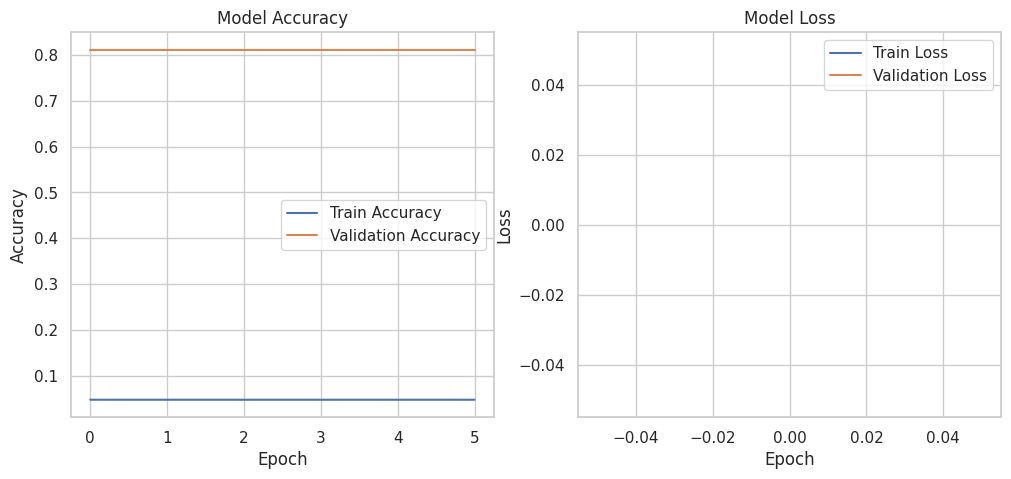

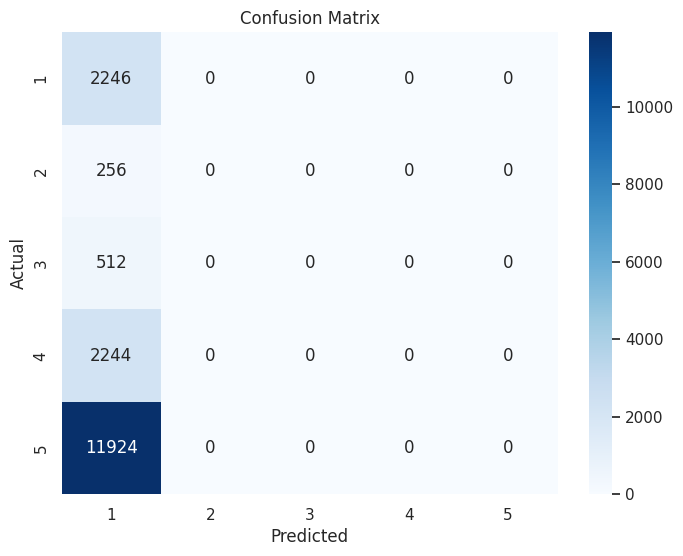

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4, 5],
            yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=256, step=64),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
            activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(5, activation='softmax'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='csat_prediction')

tuner.search(X_train_scaled, y_train_res,
             epochs=30,
             validation_split=0.2,
             callbacks=[early_stop])

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 02m 21s]
val_accuracy: 0.8118172287940979

Best val_accuracy So Far: 0.8118172287940979
Total elapsed time: 00h 25m 04s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***